## **MUHAMMAD USMAN**

### **AIR QUALITY MODEL PREDICTIONS**

In [22]:
# Importing necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
plt.style.use("ggplot")
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Datasets
data = pd.read_csv('air_quality.csv')

# Display the first five rows
display(data.head())

,id,site_id,site_latitude,site_longitude,city,country,date,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,...,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle,pm2_5
0,id_vjcx08sz91,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-10-25,13,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.015000
1,id_bkg215syli,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-11-02,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.267200
2,id_oui2pot3qd,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-11-03,13,NaN,NaN,...,6791.682888,51171.802486,5791.682829,11.816715,0.192757,-96.411890,61.045123,-121.307414,41.898269,39.450741
3,id_9aandqzy4n,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-11-08,14,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.537600
4,id_ali5x2m4iw,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-11-09,13,0.000267,0.774656,...,1451.050659,96215.906250,451.050598,10.521009,0.153114,-97.811241,49.513439,-126.064453,40.167355,19.431731


### **Inspection of Dataset**

In [6]:
# Review Data types and summary statistics
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8071 entries, 0 to 8070
Data columns (total 80 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   id                                                        8071 non-null   object 
 1   site_id                                                   8071 non-null   object 
 2   site_latitude                                             8071 non-null   float64
 3   site_longitude                                            8071 non-null   float64
 4   city                                                      8071 non-null   object 
 5   country                                                   8071 non-null   object 
 6   date                                                      8071 non-null   object 
 7   hour                                                      8071 non-null   int64  
 8   sulphurdioxide_so2

None

In [7]:
display(data.shape)
print("=============================================")
display(data.describe())

(8071, 80)

,site_latitude,site_longitude,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,sulphurdioxide_so2_slant_column_number_density,sulphurdioxide_cloud_fraction,sulphurdioxide_sensor_azimuth_angle,sulphurdioxide_sensor_zenith_angle,sulphurdioxide_solar_azimuth_angle,...,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle,pm2_5
count,8071.000000,8071.000000,8071.000000,3159.000000,3159.000000,3159.000000,3159.000000,3159.000000,3159.000000,3159.000000,...,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,8071.000000
mean,0.635678,30.246982,10.877463,0.000024,0.687295,0.000013,0.126581,2.120939,38.671939,-92.912582,...,6089.449805,58478.947647,5105.978072,16.885186,0.255501,-18.952179,45.881380,-84.811978,28.708028,24.639296
std,2.154605,9.393151,0.815875,0.000354,0.142544,0.000220,0.094129,85.450554,18.964322,43.240479,...,2991.879500,18974.281900,2971.949265,27.547282,0.046204,85.873938,14.721454,40.627170,7.038309,24.878920
min,-3.459970,3.201510,10.000000,-0.000980,0.299364,-0.000696,0.000000,-107.710861,0.177093,-165.131509,...,521.378113,10752.090499,9.741494,1.458444,0.090547,-102.706078,2.996863,-159.058782,10.314990,1.200000
25%,0.288630,32.568643,10.000000,-0.000196,0.589849,-0.000137,0.038062,-98.911720,22.811537,-134.823883,...,3687.102253,43231.418685,2701.118575,5.612198,0.228117,-98.865659,37.901279,-125.371559,24.102775,13.270600
50%,0.332610,32.600480,11.000000,0.000012,0.669632,0.000007,0.123876,71.653160,42.564364,-95.848477,...,5389.787844,60432.792969,4389.787844,8.752905,0.257323,-97.477511,49.187592,-74.597511,29.002745,18.375400
75%,0.374653,32.641110,11.000000,0.000221,0.766817,0.000149,0.209070,74.110476,54.238408,-49.662067,...,8047.738159,74276.492371,7047.738159,14.794590,0.285948,72.814735,57.156175,-49.902340,33.929767,28.838400
max,6.595400,36.914272,14.000000,0.002024,1.607052,0.001101,0.299850,77.319656,66.234924,-22.250822,...,17287.677734,100909.219778,16287.677734,250.000002,0.417945,77.319656,66.238778,-22.251009,45.496395,456.193333


In [11]:
# Checking for Duplicates and Null Values
display(data.isnull().sum())
print("=============================================")
display(data.duplicated().sum())
print("=============================================")
display(data.dtypes)

id                               0
site_id                          0
site_latitude                    0
site_longitude                   0
city                             0
                              ... 
cloud_sensor_azimuth_angle    3077
cloud_sensor_zenith_angle     3077
cloud_solar_azimuth_angle     3077
cloud_solar_zenith_angle      3077
pm2_5                            0
Length: 80, dtype: int64

0

id                             object
site_id                        object
site_latitude                 float64
site_longitude                float64
city                           object
                               ...   
cloud_sensor_azimuth_angle    float64
cloud_sensor_zenith_angle     float64
cloud_solar_azimuth_angle     float64
cloud_solar_zenith_angle      float64
pm2_5                         float64
Length: 80, dtype: object

### **Handling Missing , Duplicate Values and Irrelevant Features**

In [8]:
# Displaying the columns
display(data.columns)

Index(['id', 'site_id', 'site_latitude', 'site_longitude', 'city', 'country',
       'date', 'hour', 'sulphurdioxide_so2_column_number_density',
       'sulphurdioxide_so2_column_number_density_amf',
       'sulphurdioxide_so2_slant_column_number_density',
       'sulphurdioxide_cloud_fraction', 'sulphurdioxide_sensor_azimuth_angle',
       'sulphurdioxide_sensor_zenith_angle',
       'sulphurdioxide_solar_azimuth_angle',
       'sulphurdioxide_solar_zenith_angle',
       'sulphurdioxide_so2_column_number_density_15km', 'month',
       'carbonmonoxide_co_column_number_density',
       'carbonmonoxide_h2o_column_number_density',
       'carbonmonoxide_cloud_height', 'carbonmonoxide_sensor_altitude',
       'carbonmonoxide_sensor_azimuth_angle',
       'carbonmonoxide_sensor_zenith_angle',
       'carbonmonoxide_solar_azimuth_angle',
       'carbonmonoxide_solar_zenith_angle',
       'nitrogendioxide_no2_column_number_density',
       'nitrogendioxide_tropospheric_no2_column_number_densi

In [10]:
# Handling Missing Value
cat_variables = data.select_dtypes(include=['object']).columns
num_variables = data.select_dtypes(include=['int64', 'float64']).columns
display(cat_variables)

Index(['id', 'site_id', 'city', 'country', 'date'], dtype='object')

In [12]:
# Imputing the missing value on cat_variable
imputer = SimpleImputer(strategy='mean')
data[num_variables] = imputer.fit_transform(data[num_variables])
# Check for missing values
display(data.isnull().sum())

id                            0
site_id                       0
site_latitude                 0
site_longitude                0
city                          0
                             ..
cloud_sensor_azimuth_angle    0
cloud_sensor_zenith_angle     0
cloud_solar_azimuth_angle     0
cloud_solar_zenith_angle      0
pm2_5                         0
Length: 80, dtype: int64

### **EXPLORATORY DATA ANALYSIS**

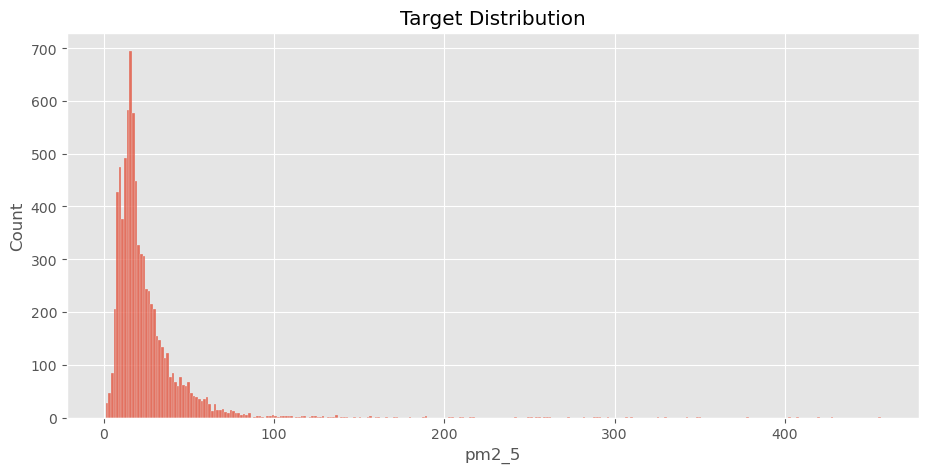

In [14]:
# target distribution
plt.figure(figsize = (11, 5))
sns.histplot(data.pm2_5)
plt.title('Target Distribution')
plt.show()

### **Data Preprocessing and Feature Engineering**

In [17]:
# Segregating numerical and categorical features
x_num = data[num_variables.drop('pm2_5')]
x_cat = data[cat_variables] 

In [18]:
# Encoding Categorical Data by using one hot encoder
encoder = OneHotEncoder(sparse=False)
x_cat_encoded =pd.DataFrame(encoder.fit_transform(x_cat), columns=encoder.get_feature_names_out())

x_cat_encoded

,id_id_00inp9bsrl,id_id_00l1c858y7,id_id_00n0wqjqa2,id_id_00wgidkvyv,id_id_010i39up9e,id_id_0168zpa1ht,id_id_018adrt1ka,id_id_01espuo1dn,id_id_01y6kp1otv,id_id_01z88atf3v,...,date_2024-02-08,date_2024-02-09,date_2024-02-10,date_2024-02-11,date_2024-02-12,date_2024-02-13,date_2024-02-23,date_2024-02-24,date_2024-02-25,date_2024-02-26
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8066,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8068,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# Combine the  numerical and categorical features
x_processed = pd.concat([x_num, x_cat_encoded], axis=1)
x_processed

,site_latitude,site_longitude,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,sulphurdioxide_so2_slant_column_number_density,sulphurdioxide_cloud_fraction,sulphurdioxide_sensor_azimuth_angle,sulphurdioxide_sensor_zenith_angle,sulphurdioxide_solar_azimuth_angle,...,date_2024-02-08,date_2024-02-09,date_2024-02-10,date_2024-02-11,date_2024-02-12,date_2024-02-13,date_2024-02-23,date_2024-02-24,date_2024-02-25,date_2024-02-26
0,6.532570,3.399360,13.0,0.000024,0.687295,0.000013,0.126581,2.120939,38.671939,-92.912582,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6.532570,3.399360,12.0,0.000024,0.687295,0.000013,0.126581,2.120939,38.671939,-92.912582,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6.532570,3.399360,13.0,0.000024,0.687295,0.000013,0.126581,2.120939,38.671939,-92.912582,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.532570,3.399360,14.0,0.000024,0.687295,0.000013,0.126581,2.120939,38.671939,-92.912582,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6.532570,3.399360,13.0,0.000267,0.774656,0.000207,0.223403,-97.811241,49.513344,-126.064468,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8066,-1.268877,36.819139,10.0,0.000024,0.687295,0.000013,0.126581,2.120939,38.671939,-92.912582,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8067,-1.268877,36.819139,11.0,-0.000563,0.595788,-0.000335,0.208774,-98.841057,48.871639,-126.041481,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8068,-1.268877,36.819139,11.0,0.000024,0.687295,0.000013,0.126581,2.120939,38.671939,-92.912582,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8069,-1.268877,36.819139,10.0,-0.000188,0.746123,-0.000140,0.089824,75.947845,18.786684,-136.811050,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **Model Development**

#### **Train Test Split**

In [21]:
# Splitting Dataset into features & Labels
x = x_processed # x is the features
y = data['pm2_5'] # y is the Target Variable
# Splittint Datasets into Training and Testing
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [23]:
# Initialization of LGBM Regression
model = LGBMRegressor()
model.fit(x_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009334 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17701
[LightGBM] [Info] Number of data points in the train set: 6456, number of used features: 301
[LightGBM] [Info] Start training from score 24.439187


LGBMRegressor()

In [25]:
y_pred = model.predict(x_test)

score = mean_squared_error(y_test, y_pred, squared=False)
print('Local RMSE:', score)

Local RMSE: 14.38762703341682
